<a href="https://colab.research.google.com/github/nihemelandu/EDA_PYTHON/blob/main/EDA_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [ ]:
!pip install calmap

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap

Data Source is from - https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales


---


The dataset contains three months of historical sales data from a supermarket with three branches in a populated city.




# Data Dictionary

Gender:


1.   Invoice id:
2.   Branch:
1.   City:
1.   Customer Type:
2.   Product Line:
  






# Task 1: Initial Data Exploration

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


In [3]:
!ls

Customer_Churn_Project.ipynb  supermarket_sales.csv  Untitled1.ipynb
EDA_PYTHON.ipynb	      Untitled0.ipynb


In [14]:
df = pd.read_csv('supermarket_sales.csv')
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291,69.111,2/22/19,15:33,Cash,65.82,4.761905,3.291,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,3/10/19,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,1/26/19,15:17,Cash,609.56,4.761905,30.478,5.5


In [10]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,float64
Tax 5%,float64
Total,float64


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df.set_index(df['Date'], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003 entries, 2019-01-05 to 2019-01-26
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1003 non-null   object        
 1   Branch                   1003 non-null   object        
 2   City                     1003 non-null   object        
 3   Customer type            924 non-null    object        
 4   Gender                   1003 non-null   object        
 5   Product line             960 non-null    object        
 6   Unit price               996 non-null    float64       
 7   Quantity                 983 non-null    float64       
 8   Tax 5%                   1003 non-null   float64       
 9   Total                    1003 non-null   float64       
 10  Date                     1003 non-null   datetime64[ns]
 11  Time                     1003 non-null   object        
 12  Payment         

In [26]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,2019-02-14 00:18:39.840478464,308.007358,4.761905e+00,15.400368,6.972682
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,2019-01-24 00:00:00,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,2019-02-13 00:00:00,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,2019-03-08 00:00:00,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.000000,4.761905e+00,49.650000,10.000000
std,26.510165,2.924673,11.715192,246.019028,NaN,234.303836,6.131488e-14,11.715192,1.717647


# What does the distribution of customer rating look like? Is it skewed?

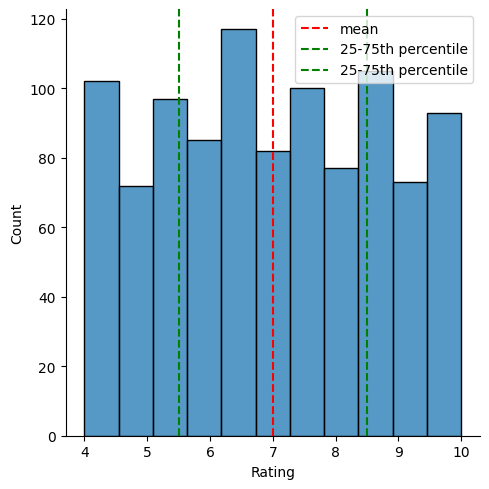

In [37]:
sns.displot(df['Rating']);
plt.axvline(x=np.percentile(df['Rating'], 50), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c='green', ls='--', label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c='green', ls='--', label='25-75th percentile')
plt.legend();